In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from datetime import date
from sklearn import metrics
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv("car_data.csv")

In [3]:
df.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
95,corolla altis,2012,5.85,18.61,72000,Petrol,Dealer,Manual,0
96,innova,2016,20.75,25.39,29000,Diesel,Dealer,Automatic,0
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0
98,corolla altis,2013,7.05,18.61,45000,Petrol,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
for i in df:
    print(df[i].value_counts())
    print("   ")
    print("------------------------")

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Royal Enfield Bullet 350     1
camry                        1
alto 800                     1
Hero Super Splendor          1
Hyosung GT250R               1
Name: Car_Name, Length: 98, dtype: int64
   
------------------------
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2007     2
2003     2
2018     1
2004     1
Name: Year, dtype: int64
   
------------------------
0.60     8
0.45     8
5.25     7
4.50     7
4.75     6
        ..
19.99    1
4.35     1
0.80     1
0.27     1
7.20     1
Name: Selling_Price, Length: 156, dtype: int64
   
------------------------
9.40     15
13.60    13
5.70      8
4.43      7
1.47      7
         ..
9.29      1
92.60     1
13.70     1
1.17      1
0.65      1
Name: Present_Price, Length: 1

In [8]:
df.drop(["Car_Name"], axis = 1, inplace = True)

In [9]:
df.head(10)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [10]:
todays_date = date.today()
  
print("Current date: ", todays_date)
  
#print("Current_year:", todays_date.year)
Current_year = todays_date.year

print("Current month:", todays_date.month)
print("Current day:", todays_date.day)

Current date:  2021-08-05
Current month: 8
Current day: 5


In [11]:
years = Current_year - df['Year']

In [12]:
print(years)

0       7
1       8
2       4
3      10
4       7
       ..
296     5
297     6
298    12
299     4
300     5
Name: Year, Length: 301, dtype: int64


In [13]:
df['years'] = years

In [14]:
df.drop(['Year'], axis=1, inplace=True)

In [15]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [16]:
df2 = pd.get_dummies(df, drop_first=True)

In [17]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


<AxesSubplot:>

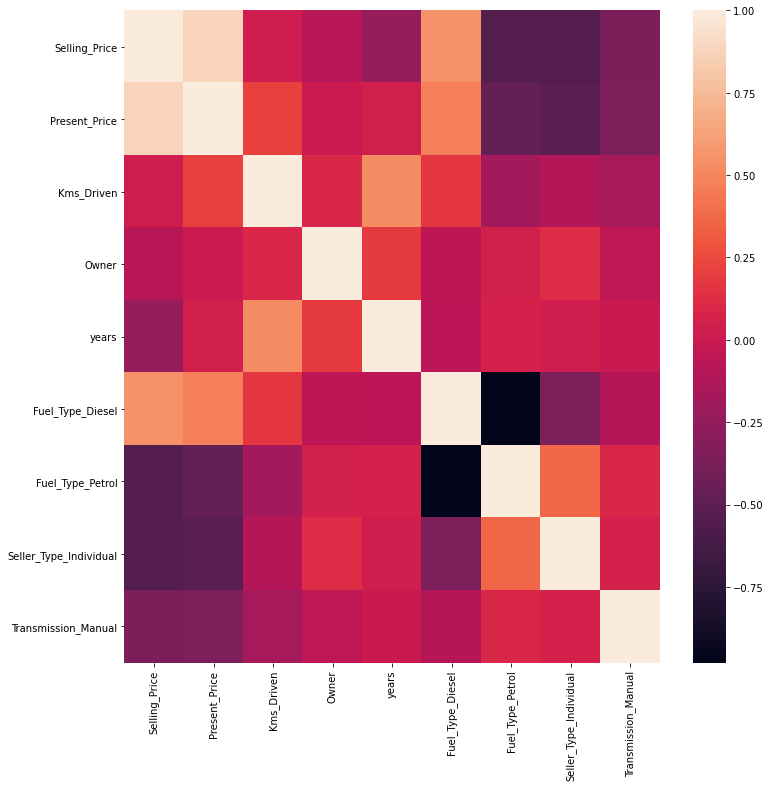

In [18]:
cor = df2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(cor)

In [19]:
cor['Selling_Price'].sort_values(ascending=False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
years                    -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

In [20]:
'''for i in df2:    
    sns.jointplot(x=df2[i], y='Selling_Price', data=df2, kind='hex')'''

"for i in df2:    \n    sns.jointplot(x=df2[i], y='Selling_Price', data=df2, kind='hex')"

In [21]:
'''for feature in df2:
    df2[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()'''

'for feature in df2:\n    df2[feature].hist(bins=25)\n    plt.xlabel(feature)\n    plt.ylabel("Count")\n    plt.title(feature)\n    plt.show()'

In [22]:
'''def plot_box(df2, feature):
    plt.figure(figsize=(10,6))
    df2.boxplot(column=[feature])
    plt.show()
for columns in df2:
    plot_box(df2,columns)'''

'def plot_box(df2, feature):\n    plt.figure(figsize=(10,6))\n    df2.boxplot(column=[feature])\n    plt.show()\nfor columns in df2:\n    plot_box(df2,columns)'

In [23]:
df2.loc[df2['Present_Price']>=22,'Present_Price']=22
df2.loc[df2['Kms_Driven']>=100000,'Kms_Driven']=100000
df2.loc[df2['years']>=15,'years']=15

In [24]:
df3=df2.copy()

In [25]:
'''def plot_box(df3, feature):
    plt.figure(figsize=(10,6))
    df3.boxplot(column=[feature])
    plt.show()
for columns in df3:
    plot_box(df3,columns)'''

'def plot_box(df3, feature):\n    plt.figure(figsize=(10,6))\n    df3.boxplot(column=[feature])\n    plt.show()\nfor columns in df3:\n    plot_box(df3,columns)'

In [26]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [27]:
'''from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df3=pd.DataFrame(min_max.fit_transform(df3),columns=df3.columns)
df3.head()'''

'from sklearn.preprocessing import MinMaxScaler\nmin_max=MinMaxScaler()\ndf3=pd.DataFrame(min_max.fit_transform(df3),columns=df3.columns)\ndf3.head()'

In [28]:
'''from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df3=pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)'''

'from sklearn.preprocessing import StandardScaler\nscaler=StandardScaler()\ndf3=pd.DataFrame(scaler.fit_transform(df3), columns=df3.columns)'

In [29]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [30]:
x=df3.drop(["Selling_Price"], axis=1)
y=df3["Selling_Price"]

In [31]:
x.head()

,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [32]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [34]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
x_train=pd.DataFrame(min_max.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(min_max.fit_transform(x_test),columns=x_test.columns)
x_train.head()

,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.397140,0.829146,0.0,0.272727,1.0,0.0,0.0,1.0
1,0.189576,0.233256,0.0,0.454545,0.0,1.0,0.0,1.0
2,1.000000,0.055276,0.0,0.000000,1.0,0.0,0.0,0.0
3,0.298893,0.326824,0.0,0.272727,0.0,1.0,0.0,1.0
4,0.349631,0.282101,0.0,0.090909,0.0,1.0,0.0,1.0


In [35]:
x_test.head()

,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.412587,0.817195,0.0,0.250000,1.0,0.0,0.0,1.0
1,0.012867,0.073826,0.0,0.583333,0.0,1.0,1.0,1.0
2,0.240093,0.324537,0.0,0.250000,0.0,1.0,0.0,1.0
3,0.515152,0.449503,0.0,0.166667,1.0,0.0,0.0,1.0
4,0.896037,0.194631,0.0,0.083333,1.0,0.0,0.0,0.0


In [36]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

print('test_score', lr.score(x_test, y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))

test_score 0.8028061617928298
RMSE: 2.232606429368657


In [37]:
from sklearn.ensemble import RandomForestRegressor
rfc =  RandomForestRegressor()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

print('test_score', lr.score(x_test, y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, rfc_pred)))

test_score 0.8028061617928298
RMSE: 1.1392967952666762


In [38]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
dtc.fit(x_test, y_test)
dtc_pred = dtc.predict(x_test)

print('test_score', lr.score(x_test, y_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, dtc_pred)))

test_score 0.8028061617928298
RMSE: 0.0


In [39]:
from sklearn.model_selection import cross_validate
cv_results_rfc = cross_validate(rfc, x, y, cv=10, return_train_score=True)

In [40]:
rfc_test_average = np.average(cv_results_rfc['test_score'])
rfc_train_average = np.average(cv_results_rfc['train_score'])

In [41]:
print(rfc_test_average)
print(rfc_train_average)

0.23276313171677118
0.9757399405929219


In [42]:
df3.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [43]:
df3.head(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
5,9.25,9.83,2071,0,3,1,0,0,1
6,6.75,8.12,18796,0,6,0,1,0,1
7,6.50,8.61,33429,0,6,1,0,0,1
8,8.75,8.89,20273,0,5,1,0,0,1
9,7.45,8.92,42367,0,6,1,0,0,1


In [44]:
testing = rfc.predict(x)
print(testing)

[ 6.9349 16.6013  6.9349  6.9349 16.6013 16.6013  6.9349 16.6013 16.6013
 16.6013  6.9349 16.6013  5.9264  6.9349  6.9349 16.6013 16.6013 16.6013
 11.0284  6.9349  6.9349  6.9349  5.9264  6.9349  6.9349  6.9349  6.9349
  6.2899  6.9349 16.6013 16.6013  6.9349 16.6013 16.6013 16.6013 11.0284
  6.9349  6.2899  6.9349  6.9349  5.9264  6.9349  6.9349 16.6013  6.9349
  5.9264  6.9349  6.9349  6.9349  5.9264 15.1648 15.1648 15.1648 14.7029
  6.2899  5.9264  6.9349  6.9349  5.6929 15.1648  6.9349  6.9349 15.1648
 15.1648 15.1648 16.6013  5.9264 16.6013  6.9349  6.9349 16.6013 16.6013
  6.9349  6.9349 16.6013  6.9349  6.9349  5.9264  5.9264 15.1648 16.6013
 16.6013 15.1648 16.6013 16.6013  4.0044 16.6013  6.9349  6.9349  6.9349
  6.9349 16.6013  6.9349 15.1648  5.9264  6.9349 15.1648  6.9349  6.9349
 16.6013  6.2899  6.2899  6.2899  6.2899  6.2899  6.2899  5.0369  6.2899
  6.2899  6.2899  6.2899  6.2899  6.2899  6.2899  6.2899  6.2899  6.2899
  6.2899  6.2899  6.2899  6.2899  6.2899  6.2899  6

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
rfc_param = {'n_estimators':[10,15,20], 
            'min_samples_split':[8,16],
            'min_samples_leaf':[1,2,3,4,5]
            }

In [47]:
rfc_grid = GridSearchCV(estimator=rfc, 
                        param_grid=rfc_param,
                        cv=10,
                        n_jobs=-1,
                        return_train_score=True)

In [48]:
rfc_grid_fit = rfc_grid.fit(x, y)

In [49]:
rfc_grid.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 15}

In [50]:
rfc_grid.best_score_

0.23021772625687748

In [51]:
predictions=rfc_grid.predict(x_test)

In [52]:
test_score = rfc_grid_fit.score(x_test, y_test)
train_score = rfc_grid_fit.score(x_test, y_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print(test_score)
print(train_score)

MAE: 4.459165599822157
MSE: 43.05812400294538
RMSE: 6.561868941311261
-0.703429257467868
-0.703429257467868


In [54]:
df3.head(10)

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1
5,9.25,9.83,2071,0,3,1,0,0,1
6,6.75,8.12,18796,0,6,0,1,0,1
7,6.50,8.61,33429,0,6,1,0,0,1
8,8.75,8.89,20273,0,5,1,0,0,1
9,7.45,8.92,42367,0,6,1,0,0,1


In [55]:
testing2 = rfc_grid.predict(x)
print(testing2)

[ 3.41051924  5.17665737  8.36192096  2.60658425  4.24525493  8.4226617
  6.62264588  6.82521748  8.06920615  7.23994451  2.89193742  7.44067844
  7.27435976  5.93343809  2.44032326  8.01096937  7.34431092  8.01096937
  3.25649146  2.78503755  2.93942227  5.26948024  3.69911279  2.57273509
  2.82691619  2.9064824   3.69727633  5.22635975  2.13661075  7.44067844
  3.40434512  2.80642821  5.03577341  6.46696171  5.45750153  3.18553622
  4.51046537  0.87961039  2.89193742  2.32824522  5.93343809  2.71031445
  2.39595818  5.45750153  1.38676383  7.09285854  2.64999423  1.94680916
  5.93343809  8.3288661  16.2631115  22.15325647 16.00598474 16.04416705
  2.95345418  3.79030135  4.59490981  4.8020773   4.05651154 22.01601838
  6.94248292  5.25336582 21.55285171 22.15325647 23.350759    4.23569937
 19.53588215  9.9575291   4.17173196 14.74446441  4.1666253   4.58129485
  7.087406    3.08888278  6.09877276  4.27203175  6.00516815  3.07884307
 11.16631481 16.2631115  11.66486557  5.25336582 23.

In [56]:
df2.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [58]:
Output_prediction = rfc_grid.predict([[6.87, 42450, 0, 7, 1, 0, 0, 1]])
print(Output_prediction)

[4.24525493]


In [ ]:
import pickle
file = open('PRICE_PREDICTION.pkl', 'wb')

pickle.dump(rfc_grid_fit , file)